In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [5]:
heart_data=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [6]:
X = heart_data.drop(columns=['HeartDiseaseorAttack'])

In [7]:
Y = heart_data['HeartDiseaseorAttack']

In [8]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
ann = tf.keras.models.Sequential()

In [11]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [12]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [13]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [14]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [15]:
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
6342/6342 [==============================] - 5s 650us/step - loss: 0.2544 - accuracy: 0.9025
Epoch 2/100
6342/6342 [==============================] - 4s 653us/step - loss: 0.2384 - accuracy: 0.9072
Epoch 3/100
6342/6342 [==============================] - 4s 657us/step - loss: 0.2376 - accuracy: 0.9078
Epoch 4/100
6342/6342 [==============================] - 4s 659us/step - loss: 0.2371 - accuracy: 0.9078
Epoch 5/100
6342/6342 [==============================] - 4s 663us/step - loss: 0.2370 - accuracy: 0.9079
Epoch 6/100
6342/6342 [==============================] - 4s 661us/step - loss: 0.2368 - accuracy: 0.9078
Epoch 7/100
6342/6342 [==============================] - 4s 664us/step - loss: 0.2367 - accuracy: 0.9079
Epoch 8/100
6342/6342 [==============================] - 4s 649us/step - loss: 0.2367 - accuracy: 0.9080
Epoch 9/100
6342/6342 [==============================] - 4s 647us/step - loss: 0.2367 - accuracy: 0.9079
Epoch 10/100
6342/6342 [==============================]

6342/6342 [==============================] - 4s 652us/step - loss: 0.2360 - accuracy: 0.9083
Epoch 79/100
6342/6342 [==============================] - 4s 654us/step - loss: 0.2360 - accuracy: 0.9081
Epoch 80/100
6342/6342 [==============================] - 4s 700us/step - loss: 0.2359 - accuracy: 0.9082
Epoch 81/100
6342/6342 [==============================] - 5s 730us/step - loss: 0.2360 - accuracy: 0.9084
Epoch 82/100
6342/6342 [==============================] - 5s 767us/step - loss: 0.2360 - accuracy: 0.9082
Epoch 83/100
6342/6342 [==============================] - 5s 727us/step - loss: 0.2360 - accuracy: 0.9081
Epoch 84/100
6342/6342 [==============================] - 5s 740us/step - loss: 0.2360 - accuracy: 0.9081
Epoch 85/100
6342/6342 [==============================] - 4s 663us/step - loss: 0.2359 - accuracy: 0.9083
Epoch 86/100
6342/6342 [==============================] - 4s 664us/step - loss: 0.2359 - accuracy: 0.9083
Epoch 87/100
6342/6342 [==============================] - 5

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\sobo\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [17]:
predictions=ann.predict(X_test).round() 

1586/1586 [==============================] - 1s 505us/step


In [18]:
from sklearn.metrics import classification_report

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(Y_test,predictions)

array([[45441,   481],
       [ 4166,   648]], dtype=int64)

In [21]:
cm=confusion_matrix(Y_test,predictions)

In [22]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45922
           1       0.57      0.13      0.22      4814

    accuracy                           0.91     50736
   macro avg       0.74      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



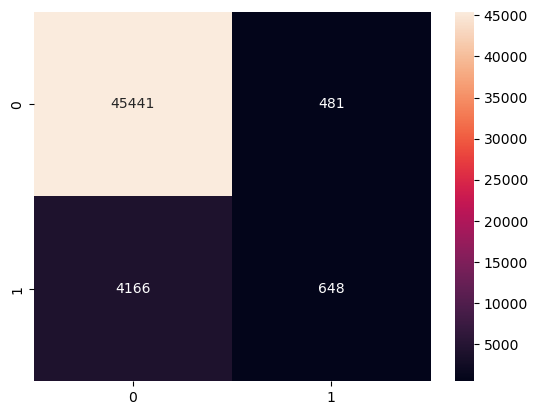

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


f = sns.heatmap(cm, annot=True, fmt='d')

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['No', 'Yes']))


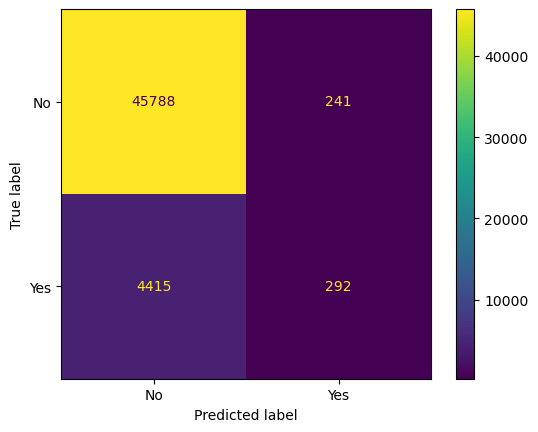

In [25]:
ConfusionMatrixDisplay; disp = ConfusionMatrixDisplay(confusion_matrix=np.asarray([[45788,   241],
       [ 4415,   292]]), display_labels= np.asarray(['No','Yes'])) ;  disp.plot()

In [26]:
print(accuracy_score(Y_test,predictions))

0.9084082308420057


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10,))
model.fit(X, Y)
importance = model.coefs_[0].mean(axis=0)

# Print the feature importance values
print("Feature importance:", importance)

In [ ]:
sns.barplot(x='features', y='importance', data=heart_data)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(ann, random_state=1).fit(X_test,Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
# Initialize a list of results
results = []


In [ ]:
from sklearn.metrics import mean_squared_error
rmse_full_mod = mean_squared_error(model.predict(X_test), Y_test, squared = False)

In [ ]:
# Iterate through each predictor
for predictor in X_test:
    
    # Create a copy of X_test
    X_test_copy = X_test.copy()
    
    # Scramble the values of the given predictor
    X_test_copy[predictor] = X_test[predictor].sample(frac=1).values
    
    # Calculate the new RMSE
    new_rmse = mean_squared_error(model.predict(X_test_copy), Y_test,
                                  squared = False)
    
    # Append the increase in MSE to the list of results 
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })

In [ ]:
# Convert to a pandas dataframe and rank the predictors by score
resultsdf = pd.DataFrame(results).sort_values(by = 'score',
                                              ascending = False)

In [ ]:
resultsdf

In [ ]:
resultsdf.plot(x ='pred', y ='score', kind='bar')